## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



In [66]:
# your code here
%matplotlib inline

import pandas as pd, numpy as np
import osmnx as ox, geopandas as gpd
import matplotlib.pyplot as plt
from pysal.lib import weights

## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [67]:
# load up the IMD dataset
imd = gpd.read_file('d:/OneDrive - Wageningen University & Research/files/Metropolitan Data 1/lab-04/IMD/lab04_imd.shp')
imd.head()

lsoa11cd                   lsoa11nm                  lsoa11nmw  \
0  E01000001        City of London 001A        City of London 001A   
1  E01000002        City of London 001B        City of London 001B   
2  E01000003        City of London 001C        City of London 001C   
3  E01000005        City of London 001E        City of London 001E   
4  E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A   

      st_areasha   st_lengths  IMD_Rank  IMD_Decile  \
0  133320.768872  2291.846072     29199           9   
1  226191.272990  2433.960112     30379          10   
2   57302.966538  1142.359799     14915           5   
3  190738.760504  2167.868343      8678           3   
4  144195.846857  1935.510354     14486           5   

                    LSOA01NM      LADcd                 LADnm  ...  IndDec  \
0        City of London 001A  E09000001        City of London  ...       5   
1        City of London 001B  E09000001        City of London  ...       7   
2        City of London 001C  E09000001        City of London  ...       6   
3        City of London 001E  E09000001        City of London  ...       8   
4  Barking and Dagenham 016A  E09000002  Barking and Dagenham  ...       5   

   OutScore  OutRank  OutDec  TotPop  DepChi  Pop16_59  Pop60+  WorkPop  \
0     1.503     1615       1    1296     175       656     465   715.00   
1     1.196     2969       1    1156     182       580     394   619.75   
2     2.207      162       1    1350     146       759     445   804.00   
3     1.769      849       1    1121     229       692     200   683.00   
4     0.969     4368       2    2040     522      1297     221  1284.50   

                                            geometry  
0  POLYGON ((532105.092 182011.23, 532162.491 181...  
1  POLYGON ((532746.813 181786.891, 532671.688 18...  
2  POLYGON ((532135.145 182198.119, 532158.25 182...  
3  POLYGON ((533807.946 180767.77, 533649.063 180...  
4  POLYGON ((545122.049 184314.931, 545271.917 18...  

[5 rows x 64 columns]

In [68]:
# display all the columns in IMD, to find the correct name of IMD_score in dataframe
print(imd.columns)

Index(['lsoa11cd', 'lsoa11nm', 'lsoa11nmw', 'st_areasha', 'st_lengths',
       'IMD_Rank', 'IMD_Decile', 'LSOA01NM', 'LADcd', 'LADnm', 'IMDScore',
       'IMDRank0', 'IMDDec0', 'IncScore', 'IncRank', 'IncDec', 'EmpScore',
       'EmpRank', 'EmpDec', 'EduScore', 'EduRank', 'EduDec', 'HDDScore',
       'HDDRank', 'HDDDec', 'CriScore', 'CriRank', 'CriDec', 'BHSScore',
       'BHSRank', 'BHSDec', 'EnvScore', 'EnvRank', 'EnvDec', 'IDCScore',
       'IDCRank', 'IDCDec', 'IDOScore', 'IDORank', 'IDODec', 'CYPScore',
       'CYPRank', 'CYPDec', 'ASScore', 'ASRank', 'ASDec', 'GBScore', 'GBRank',
       'GBDec', 'WBScore', 'WBRank', 'WBDec', 'IndScore', 'IndRank', 'IndDec',
       'OutScore', 'OutRank', 'OutDec', 'TotPop', 'DepChi', 'Pop16_59',
       'Pop60+', 'WorkPop', 'geometry'],
      dtype='object')


<Axes: >

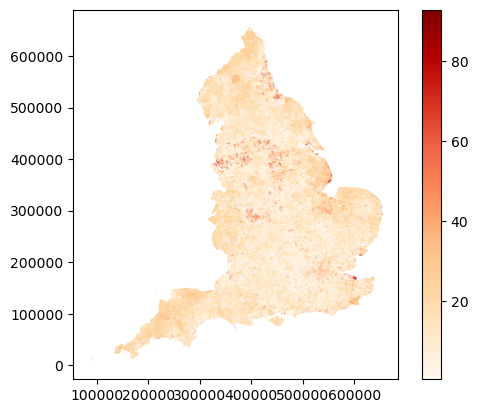

In [69]:
# Create a choropleth of the `imd_score` variable.
imd.plot(column='IMDScore',cmap='OrRd',legend=True)
    # cmap: colormap
#plt.show()

In [70]:
# Compute the spatial weights matrix for the LSOAs. 
# Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.

w = weights.Queen.from_dataframe(imd,ids = 'lsoa11cd')
print(w)

e:\Anaconda\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning:

The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There is 1 island with id: E01019077.



In [71]:
from libpysal.weights import DistanceBand
w = DistanceBand.from_dataframe(imd,threshold=5000)
print(w)

e:\Anaconda\Lib\site-packages\libpysal\weights\util.py:826: UserWarning:

The weights matrix is not fully connected: 
 There are 484 disconnected components.
 There are 351 islands with ids: 7914, 12582, 12591, 12593, 12623, 12688, 12725, 13570, 13576, 13580, 13581, 13590, 13591, 13592, 13593, 13596, 13626, 13627, 13631, 15152, 17595, 17622, 17915, 17945, 17978, 18220, 18310, 18311, 18384, 18386, 18387, 18403, 18413, 18422, 18426, 18427, 18432, 18535, 18541, 18548, 18550, 18564, 18565, 18589, 18675, 18681, 18682, 18685, 18695, 18715, 18732, 18735, 18749, 18759, 18760, 18761, 18764, 18766, 18769, 18770, 18771, 18772, 18775, 18776, 18777, 18778, 18779, 18780, 18781, 18793, 18794, 18795, 18800, 18801, 18806, 18808, 18812, 18832, 18837, 18840, 18841, 18842, 19057, 19059, 19060, 19065, 19067, 19070, 19216, 19386, 19414, 19492, 19493, 19513, 19519, 19520, 19525, 19530, 19531, 19540, 19541, 19543, 19569, 19570, 19574, 19581, 19585, 19702, 19706, 19729, 19730, 19732, 19733, 19734, 19744, 19746

e:\Anaconda\Lib\site-packages\libpysal\weights\distance.py:844: UserWarning:

The weights matrix is not fully connected: 
 There are 484 disconnected components.
 There are 351 islands with ids: 7914, 12582, 12591, 12593, 12623, 12688, 12725, 13570, 13576, 13580, 13581, 13590, 13591, 13592, 13593, 13596, 13626, 13627, 13631, 15152, 17595, 17622, 17915, 17945, 17978, 18220, 18310, 18311, 18384, 18386, 18387, 18403, 18413, 18422, 18426, 18427, 18432, 18535, 18541, 18548, 18550, 18564, 18565, 18589, 18675, 18681, 18682, 18685, 18695, 18715, 18732, 18735, 18749, 18759, 18760, 18761, 18764, 18766, 18769, 18770, 18771, 18772, 18775, 18776, 18777, 18778, 18779, 18780, 18781, 18793, 18794, 18795, 18800, 18801, 18806, 18808, 18812, 18832, 18837, 18840, 18841, 18842, 19057, 19059, 19060, 19065, 19067, 19070, 19216, 19386, 19414, 19492, 19493, 19513, 19519, 19520, 19525, 19530, 19531, 19540, 19541, 19543, 19569, 19570, 19574, 19581, 19585, 19702, 19706, 19729, 19730, 19732, 19733, 19734, 19744, 1

In [72]:
#losa_weights = weights.Rook.from_dataframe(imd, ids= 'lsoa11cd')
#w_losa = DistanceBand.from_dataframe(imd,threshold=5000)
#print(w)

In [73]:
# Create the standardized version of the IMD scores.
imd['imd_standardized'] = (imd['IMDScore'] - imd['IMDScore'].mean()) / imd['IMDScore'].std()
print(imd[['IMDScore','imd_standardized']])

       IMDScore  imd_standardized
0         6.208         -1.008424
1         5.143         -1.077886
2        19.402         -0.147884
3        28.652          0.455420
4        19.837         -0.119512
...         ...               ...
32839    74.468          3.443635
32840    59.599          2.473848
32841    21.895          0.014715
32842    66.704          2.937251
32843    52.286          1.996879

[32844 rows x 2 columns]


Text(0, 0.5, 'Frequency')

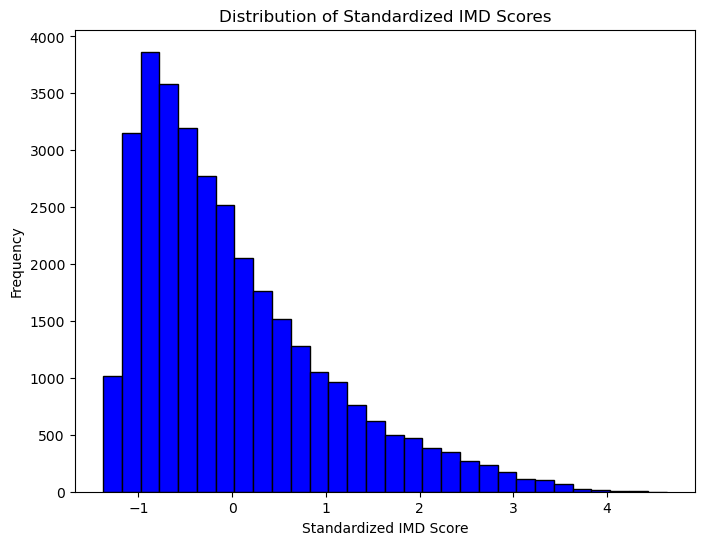

In [74]:
plt.figure(figsize=(8, 6))
plt.hist(imd['imd_standardized'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Standardized IMD Scores')
plt.xlabel('Standardized IMD Score')
plt.ylabel('Frequency')


Text(0, 0.5, 'Standardized IMD Score')

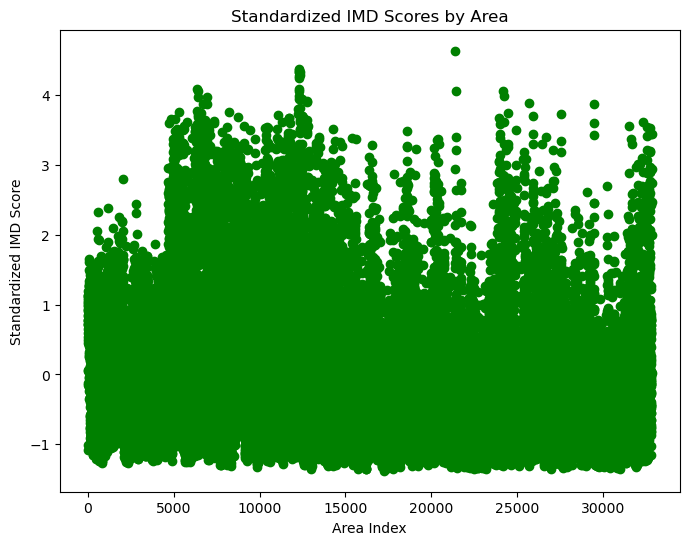

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(imd.index, imd['imd_standardized'], color='green')
plt.title('Standardized IMD Scores by Area')
plt.xlabel('Area Index')
plt.ylabel('Standardized IMD Score')


Text(0.5, 1.0, 'Choropleth Map of Standardized IMD Scores')

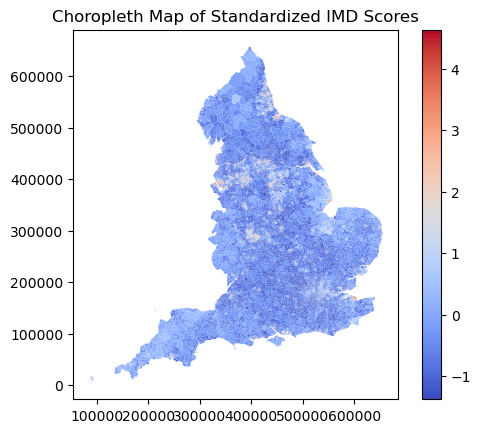

In [76]:
imd.plot(column='imd_standardized', cmap='coolwarm', legend=True)
plt.title('Choropleth Map of Standardized IMD Scores')


In [77]:
# Calculate the spatial lag of the standardized scores.
from libpysal.weights import lag_spatial

imd['spatial_lag'] = lag_spatial(w, imd['imd_standardized'])

print(imd[['imd_standardized', 'spatial_lag']])

       imd_standardized  spatial_lag
0             -1.008424   188.250517
1             -1.077886   196.649543
2             -0.147884   185.997330
3              0.455420   228.164289
4             -0.119512   119.095780
...                 ...          ...
32839          3.443635   417.941931
32840          2.473848   280.747555
32841          0.014715   199.456917
32842          2.937251   199.963029
32843          1.996879   315.240615

[32844 rows x 2 columns]


Text(0.5, 1.0, 'Choropleth Map of Spatial Lag of Standardized IMD Scores')

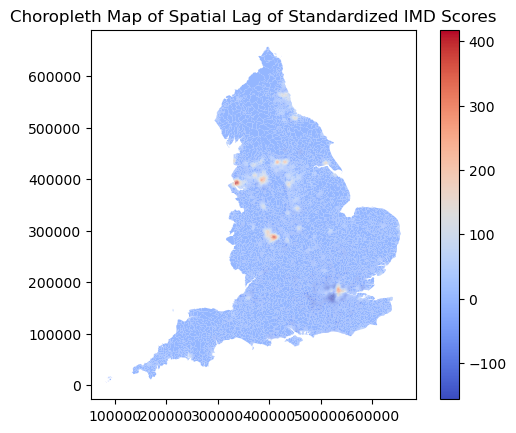

In [78]:
imd.plot(column='spatial_lag', cmap='coolwarm', legend=True)
plt.title('Choropleth Map of Spatial Lag of Standardized IMD Scores')


Text(0, 0.5, 'Frequency')

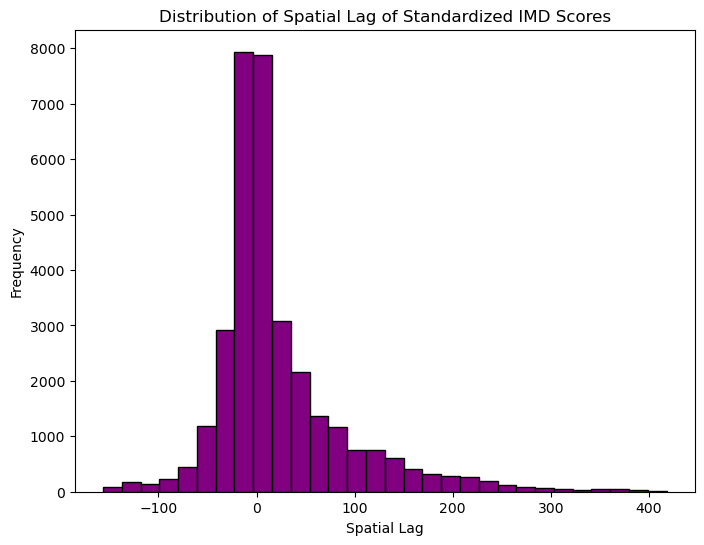

In [79]:
plt.figure(figsize=(8, 6))
plt.hist(imd['spatial_lag'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Spatial Lag of Standardized IMD Scores')
plt.xlabel('Spatial Lag')
plt.ylabel('Frequency')

('WARNING: ', 7914, ' is an island (no neighbors)')
('WARNING: ', 12582, ' is an island (no neighbors)')
('WARNING: ', 12591, ' is an island (no neighbors)')
('WARNING: ', 12593, ' is an island (no neighbors)')
('WARNING: ', 12623, ' is an island (no neighbors)')
('WARNING: ', 12688, ' is an island (no neighbors)')
('WARNING: ', 12725, ' is an island (no neighbors)')
('WARNING: ', 13570, ' is an island (no neighbors)')
('WARNING: ', 13576, ' is an island (no neighbors)')
('WARNING: ', 13580, ' is an island (no neighbors)')
('WARNING: ', 13581, ' is an island (no neighbors)')
('WARNING: ', 13590, ' is an island (no neighbors)')
('WARNING: ', 13591, ' is an island (no neighbors)')
('WARNING: ', 13592, ' is an island (no neighbors)')
('WARNING: ', 13593, ' is an island (no neighbors)')
('WARNING: ', 13596, ' is an island (no neighbors)')
('WARNING: ', 13626, ' is an island (no neighbors)')
('WARNING: ', 13627, ' is an island (no neighbors)')
('WARNING: ', 13631, ' is an island (no neighbo

Text(0.5, 1.0, "Moran's Plot of Standaridized IMD Scores")

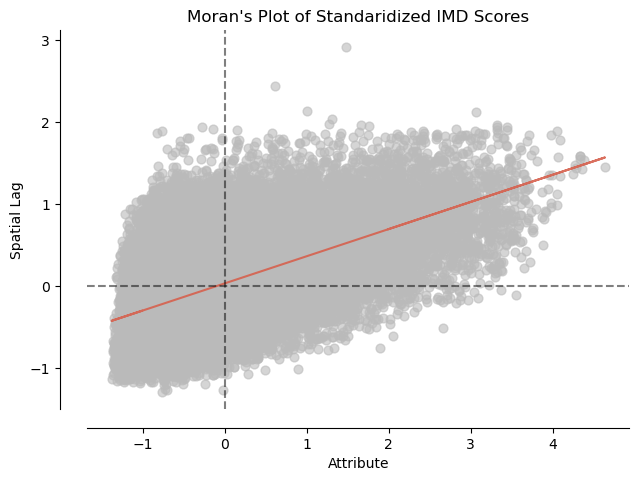

In [80]:
# Create the Moran Plot.
import esda,splot
from splot.esda import moran_scatterplot

moran = esda.Moran(imd['imd_standardized'],w)
fig,ax = moran_scatterplot(moran)
plt.title("Moran's Plot of Standaridized IMD Scores")


In [81]:
# Calculate the value of Moran's I as well as its significance level.
print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")

Moran's I: 0.3347009617368728
p-value: 0.001


In [82]:
# Perform a LISA analysis and generate a map of the results. What are the main patterns?

lisa = esda.Moran_Local(imd['imd_standardized'], w)



e:\Anaconda\Lib\site-packages\esda\moran.py:1084: RuntimeWarning:

invalid value encountered in divide



In [83]:
sig = 1 * (lisa.p_sim < 0.05)  
hotspots = 1 * (sig * lisa.q == 1) 
coldspots = 2 * (sig * lisa.q == 3) 
doughnuts = 3 * (sig * lisa.q == 2) 
diamonds = 4 * (sig * lisa.q == 4) 
spots = hotspots + coldspots + doughnuts + diamonds
spots

array([3, 3, 3, ..., 1, 1, 1])

Text(0.5, 1.0, 'LISA Cluster Map')

<Figure size 1000x600 with 0 Axes>

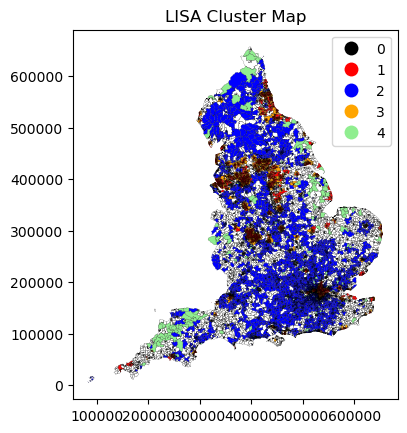

In [84]:
from matplotlib import colors
cmap = colors.ListedColormap(['none', 'red', 'blue', 'orange', 'lightgreen'])
boundaries = [0, 1, 2, 3, 4, 5]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)


plt.figure(figsize=(10, 6))
imd.assign(cl=spots).plot(column='cl', categorical=True, k=2, cmap=cmap, linewidth=0.1, edgecolor='black', legend=True)
plt.title('LISA Cluster Map')


## Part 2

For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!



In [85]:
#Importing libraries
import pandas as pd, geopandas as gpd


#---------------- SETTING UP THE PATH AND READING FILE -------------
path = 'c:/Users/96192/Desktop/2024_BBGA_1705_f35f82aa98.xlsx'
#we are only reading the sheet called indicatoren 
gdf = gpd.read_file(path,sheet='indicatoren')
#-------------------------------------------------------------------



C:\Users\96192\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning:

driver XLSX does not support open option SHEET

C:\Users\96192\AppData\Roaming\Python\Python312\site-packages\pyogrio\geopandas.py:261: UserWarning:

More than one layer found in '2024_BBGA_1705_f35f82aa98.xlsx': 'indicatoren' (default), 'metadata'. Specify layer parameter to avoid this warning.



In [86]:
#--------------------------- CLEANING UP THE DATASET ------------------------------

#we are selecting only the GGW-gebied neighbourhood and only in the year 2022
gdf_clean = gdf[(gdf['niveaunaam']=='GGW-gebied') & (gdf['jaar']==2022)]

#bar = gdf['BHHORECA_1000INW']                              ??????

#Printing the head of the cleaned dataset and understanding its lenght: len(gdf_clean)
print('the total row number',len(gdf_clean))
gdf_clean.head()
#-----------------------------------------------------------------------------------

the total row number 26


niveau  niveaunaam sd   sdnaam gebiedcode22              gebiedcodenaam  \
11     3.0  GGW-gebied  A  Centrum         GA01           GA01 Centrum-West   
12     3.0  GGW-gebied  A  Centrum         GA02           GA02 Centrum-Oost   
13     3.0  GGW-gebied  E     West         GE03             GE03 Westerpark   
14     3.0  GGW-gebied  E     West         GE04          GE04 Bos en Lommer   
15     3.0  GGW-gebied  E     West         GE05  GE05 Oud West, De Baarsjes   

               gebiednaam   gsd  jaar  BEVOPLBASIS_P  ...  WZHBH_P  PMANTEL_P  \
11           Centrum-West  None  2022           12.0  ...      NaN       10.0   
12           Centrum-Oost  None  2022           14.0  ...      NaN        9.0   
13             Westerpark  None  2022           20.0  ...      NaN       10.0   
14          Bos en Lommer  None  2022           27.0  ...      NaN        7.0   
15  Oud West, De Baarsjes  None  2022           17.0  ...      NaN        7.0   

    PMANTEL65_P  WZOOO_P  MDIERENPLAGEN_R  LBOUWOVERLAST_R  LKAMERVERHUUR_P  \
11         19.0      NaN              NaN              NaN              NaN   
12         17.0      NaN              NaN              NaN              NaN   
13         20.0      NaN              NaN              NaN              NaN   
14         11.0      NaN              NaN              NaN              NaN   
15         13.0      NaN              NaN              NaN              NaN   

    LWONINGOPDEEL_P  IHHBSTKIND  IHHBSTKIND_P  
11              NaN       115.0           4.7  
12              NaN       140.0           4.9  
13              NaN       305.0           9.2  
14              NaN       490.0          14.0  
15              NaN       510.0           9.0  

[5 rows x 933 columns]

In [87]:
#------------------------ LOADING IN THE GEOJSON WITH THE DATA OF AMSTERDAM ----------------------

#opening the url
geojson_url = 'https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_GEBIED_EXWATER&THEMA=gebiedsindeling'
#reading the geospatial data. Shape is a GeoDataFrame
shape = gpd.read_file(geojson_url)

#printing
shape
#-------------------------------------------------------------------------------------------------

Gebiedcode                                 Gebied Stadsdeelcode  \
0        GT21                           Bijlmer-West             T   
1        GT22                        Bijlmer-Centrum             T   
2        GT23                           Bijlmer-Oost             T   
3        GE04                          Bos en Lommer             E   
4        GK11                               Oud-Zuid             K   
5        GF08                                 Osdorp             F   
6        GM15  Indische Buurt, Oostelijk Havengebied             M   
7        GA01                           Centrum-West             A   
8        GN18                             Noord-West             N   
9        GT24                             Gaasperdam             T   
10       GF06                  Sloterdijk Nieuw-West             F   
11       GF09          De Aker, Sloten, Nieuw-Sloten             F   
12       GA02                           Centrum-Oost             A   
13       GM17                IJburg, Zeeburgereiland             M   
14       GF07                 Geuzenveld, Slotermeer             F   
15       GM14                               Oud-Oost             M   
16       GE03                             Westerpark             E   
17       GK12                  Buitenveldert, Zuidas             K   
18       GS25                        Weesp, Driemond             S   
19       GN20                             Noord-Oost             N   
20       GE05                  Oud-West, De Baarsjes             E   
21       GK13                 De Pijp, Rivierenbuurt             K   
22       GN19                              Oud-Noord             N   
23       GF10                            Slotervaart             F   
24       GM16                        Watergraafsmeer             M   

     Stadsdeel  Oppervlakte_m2  \
0     Zuidoost         5253723   
1     Zuidoost         3146057   
2     Zuidoost         4060529   
3         West         2226099   
4         Zuid         5382897   
5   Nieuw-West         9035470   
6         Oost         3016205   
7      Centrum         3191004   
8        Noord         8467695   
9     Zuidoost         6739283   
10  Nieuw-West         7669361   
11  Nieuw-West         6639928   
12     Centrum         4153133   
13        Oost         5884133   
14  Nieuw-West         7213463   
15        Oost         2108424   
16        West         4513476   
17        Zuid         7359185   
18       Weesp        25042860   
19       Noord        29551916   
20        West         3314441   
21        Zuid         3807230   
22       Noord         6242800   
23  Nieuw-West         5500860   
24        Oost         8654468   

                                             geometry  
0   POLYGON ((4.94021 52.31934, 4.93959 52.31912, ...  
1   POLYGON ((4.95676 52.32405, 4.95518 52.3235, 4...  
2   POLYGON ((4.95676 52.32405, 4.95934 52.32122, ...  
3   POLYGON ((4.83534 52.37315, 4.8406 52.37233, 4...  
4   POLYGON ((4.84194 52.34598, 4.84195 52.34556, ...  
5   POLYGON ((4.75908 52.38094, 4.75909 52.38076, ...  
6   MULTIPOLYGON (((4.91114 52.3777, 4.91116 52.37...  
7   MULTIPOLYGON (((4.87549 52.37341, 4.87543 52.3...  
8   MULTIPOLYGON (((4.85829 52.41868, 4.85868 52.4...  
9   MULTIPOLYGON (((4.99708 52.31487, 4.99709 52.3...  
10  POLYGON ((4.84432 52.3953, 4.84399 52.39526, 4...  
11  POLYGON ((4.84711 52.3371, 4.84703 52.33769, 4...  
12  MULTIPOLYGON (((4.90291 52.37643, 4.90227 52.3...  
13  MULTIPOLYGON (((5.03092 52.3537, 5.02923 52.35...  
14  POLYGON ((4.75896 52.38412, 4.75899 52.38367, ...  
15  POLYGON ((4.91287 52.3484, 4.91541 52.34954, 4...  
16  POLYGON ((4.84432 52.3953, 4.84423 52.39494, 4...  
17  MULTIPOLYGON (((4.85516 52.3325, 4.8539 52.332...  
18  MULTIPOLYGON (((5.05878 52.31741, 5.05877 52.3...  
19  MULTIPOLYGON (((5.03002 52.41694, 5.02995 52.4...  
20  POLYGON ((4.84304 52.37222, 4.84303 52.37191, ...  
21  POLYGON ((4.90395 52.35904, 4.90167 52.3586, 4...  
22  POLYG

In [88]:
# ----------------------- LOOKING FOR DIFFERENCES IN THE DATASETS ----------------------------

# .concat puts the two datasets one after the other 
# .drop_duplicates(keep=False) removes duplicates for the concatenated sets
# results are saved in data_diff dataset
data_diff = pd.concat([gdf_clean['gebiedcode22'],shape['Gebiedcode']]).drop_duplicates(keep=False)

#printing the gebiedscode values that don't overlap between the two datasets
data_diff                  
# --------------------------------------------------------------------------------------------

36    ZX99
dtype: object

In [89]:
# --------------------------------------- MERGING --------------------------------------------

'''
1) operating a join between the two datasets. 
2) how='left' operates a left join in order to maintain the data from the shapefile even if they
   have no correspondance in the other dataset 
3) left_on='Gebiedcode' is the column used as key in the shape dataset
4) right_on='gebiedcode22'is the column used as key in the gdf_clean dataset
'''

df = pd.merge(shape,gdf_clean, how='left', left_on='Gebiedcode',right_on='gebiedcode22' )

#printing the columns of the merged dataset
print(df.columns)
#creating a smaller dataset containing only the 'BHHORECA_1000INW' and 'Gebied' columns
num_bar = df[['BHHORECA_1000INW', 'Gebied']]
#printing
num_bar          

# --------------------------------------------------------------------------------------------

Index(['Gebiedcode', 'Gebied', 'Stadsdeelcode', 'Stadsdeel', 'Oppervlakte_m2',
       'geometry', 'niveau', 'niveaunaam', 'sd', 'sdnaam',
       ...
       'WZHBH_P', 'PMANTEL_P', 'PMANTEL65_P', 'WZOOO_P', 'MDIERENPLAGEN_R',
       'LBOUWOVERLAST_R', 'LKAMERVERHUUR_P', 'LWONINGOPDEEL_P', 'IHHBSTKIND',
       'IHHBSTKIND_P'],
      dtype='object', length=939)


BHHORECA_1000INW                                 Gebied
0               30.0                           Bijlmer-West
1                5.0                        Bijlmer-Centrum
2                3.0                           Bijlmer-Oost
3                5.0                          Bos en Lommer
4                8.0                               Oud-Zuid
5                4.0                                 Osdorp
6                5.0  Indische Buurt, Oostelijk Havengebied
7               31.0                           Centrum-West
8                3.0                             Noord-West
9                3.0                             Gaasperdam
10              57.0                  Sloterdijk Nieuw-West
11               3.0          De Aker, Sloten, Nieuw-Sloten
12              21.0                           Centrum-Oost
13               3.0                IJburg, Zeeburgereiland
14               3.0                 Geuzenveld, Slotermeer
15               8.0                               Oud-Oost
16               8.0                             Westerpark
17               7.0                  Buitenveldert, Zuidas
18              48.0                        Weesp, Driemond
19               4.0                             Noord-Oost
20               9.0                  Oud-West, De Baarsjes
21              10.0                 De Pijp, Rivierenbuurt
22               9.0                              Oud-Noord
23               5.0                            Slotervaart
24               5.0                        Watergraafsmeer

Text(0.5, 1.0, 'Horeca distribution per 1000 residents divided into 25 areas of Amsterdam')

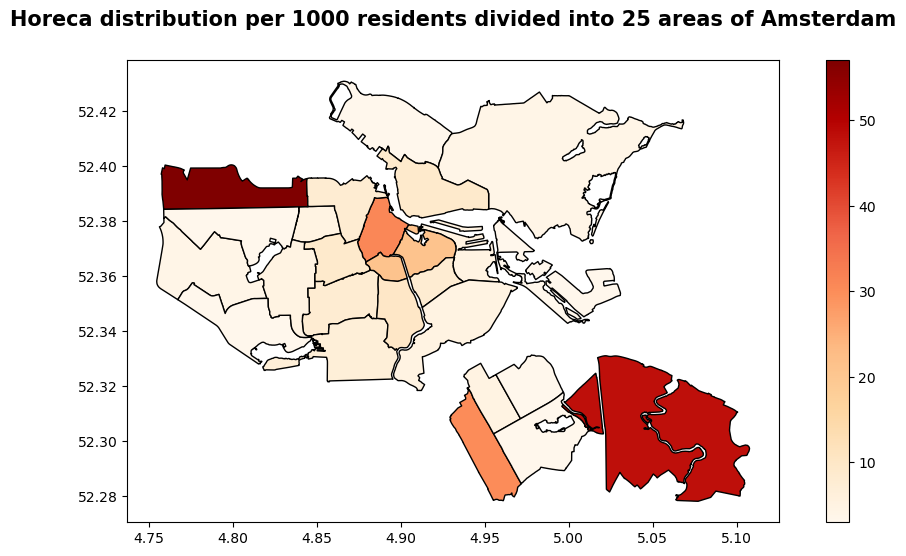

In [90]:
# ------------------------- PLOTTING THE MAP -------------------------
# plotting the merged dataframe df.plot
# choosing the BHHORECA_1000INW column as the one to be plotted
# cmap, legend, figsize, edgecolor, set_title for visual representation of colour,
# legend, dimensions, edges and title of the graph 

ax= df.plot(column='BHHORECA_1000INW',edgecolor='black',cmap='OrRd',legend=True,figsize=(12,6))
ax.set_title('Horeca distribution per 1000 residents divided into 25 areas of Amsterdam', fontdict={'fontsize':15, 'fontweight': 'bold'},pad=25)
# ---------------------------------------------------------------------)


In [91]:
import geopandas as gpd
import plotly.express as px


# Assuming your GeoDataFrame is df and it contains 'Gebied', 'BHHORECA_1000INW', and 'geometry'

# Ensure the GeoDataFrame is using the correct projection (WGS 84)
df = df.to_crs(epsg=4326)

# Create the plot using Plotly Express
fig = px.choropleth(
    df,  # Your GeoDataFrame
    geojson=df.geometry,  # The geometries to plot
    locations=df.index,  # Use the index as the identifier for each area
    color='BHHORECA_1000INW',  # Color based on 'BHHORECA_1000INW'
    hover_name='Gebied',  # Show the 'Gebied' name on hover
    title='Horeca distribution per 1000 residents divided into 25 areas of Amsterdam',
    color_continuous_scale='OrRd',  # Color scale for the distribution
    labels={'BHHORECA_1000INW': 'Horeca per 1000 residents'}  # Change the legend title
)

# Update the map layout to make it more readable
fig.update_geos(
    fitbounds="locations",  # Fit the map to the bounds of the geometries
    visible=False  # Hide the base map
)

fig.update_layout(
    title_text='Horeca distribution per 1000 residents divided into 25 areas of Amsterdam',
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust title position
    title_font=dict(size=25, family="Arial", color="black"),  # Adjust font size and style
    title_xanchor='center',  # Ensure title is centered    
)


# Show the figure
fig.show()

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.



In [92]:
############################### QUESTION 1 ###############################

# importing libraries
from pysal.lib import weights

# defining the function that reads a shapefile
def create_contiguity_weights(shapefile):

    # Constructing the W matrix with the Queen criteria that considers
    # two poligons neighbors if they share at least one point.
    W = weights.Queen.from_dataframe(shapefile,use_index=False) 

    # Returning the Queen matrix
    return W



# Calling the function with dataframe
W = create_contiguity_weights(df)
W

#############################################################################


e:\Anaconda\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning:

The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There is 1 island with id: 13.



## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.



In [93]:
############################ QUESTION 2 ##################################
#importing esda 
import esda

#defining the function that calculates Moran's I
def calculate_morans_i(W,y):

    #saving the results of .Moran (that calculates the statistic and the p-value)
    # y is our variable and W is the wight matrix
    moran = esda.Moran(y,W)       

    #morans.I returns the statistic itself that indicates clustering or not
    #moran.p_sim returns the p-value
    return moran.I, moran.p_sim

# creating the y attribute array with the 'BHHORECA_1000INW' column
y = df['BHHORECA_1000INW'].values

#calling in the function
calculate_morans_i(W,y)

###########################################################################


('WARNING: ', 13, ' is an island (no neighbors)')


(-0.11093646712536374, 0.357)

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.



In [94]:
########################### QUESTION 3 ###############################

#defining the function that standardizes the weight matrix
def standardize_weight(W_standarized):

    #this line standardizes by row 'r'
    W.transform = 'r'
    
    #returning the standardized matrix
    return W_standarized

# calling in the function
W_standarized = standardize_weight(W)

#checking that the sum of weights of each row is one
#.flatten makes it a 1d array
print((W_standarized.sparse.sum(axis=1)).flatten())

######################################################################

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


<font color = 'mediumpurple'> <font size = '5'>
The sum of all weights in the various rows is 1 except one. The zero is justified by the fact that there is a so called " island " that disrupts the calculation of weights. 

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.



In [95]:
###################################### QUESTION 4 #########################################


#------------------------ THE FUNCTION --------------------------------
# defining the function that constructs the distance-based spatial weight matrix.
# it needs the coordinates of the points and the treshold for setting the radius 
# that, if exceeded by the points, will lead to their weight being 0. Otherwise
# the weight will be 1

def create_distance_weights(coordinates,threshold_distance):

    # .DistanceBand creates the new matrix
    W = weights.DistanceBand(coordinates,threshold_distance,binary=True)

    #returns W
    return W
#-----------------------------------------------------------------------


In [96]:
#-------------------------- CENTROID ----------------------------------
# extracting the centroid coordinates and storing them in an array
# coordinates (e.g., x, y or longitude, latitude)

#extracting with a for cycle in the df
coordinates = np.array([(pt.x, pt.y) for pt in df.geometry.centroid])

#printing phase
print('The centroid of 25 area:')
print(coordinates)
#-------------------------------------------------------------------


The centroid of 25 area:
[[ 4.95014155 52.29672447]
 [ 4.95398883 52.31512803]
 [ 4.97731739 52.32028033]
 [ 4.84961948 52.37892643]
 [ 4.8647098  52.35040035]
 [ 4.78416179 52.36292519]
 [ 4.94037146 52.36790667]
 [ 4.88835181 52.37625158]
 [ 4.8956219  52.41421817]
 [ 4.98341337 52.29994698]
 [ 4.79558812 52.39087638]
 [ 4.80727803 52.3430984 ]
 [ 4.90779883 52.36724582]
 [ 4.99274272 52.35853669]
 [ 4.80348777 52.37783883]
 [ 4.92036448 52.35794756]
 [ 4.86709732 52.38677359]
 [ 4.87048182 52.33248165]
 [ 5.05446832 52.30412078]
 [ 4.9842715  52.40235057]
 [ 4.8620358  52.36617137]
 [ 4.89893528 52.34671484]
 [ 4.91852196 52.39139278]
 [ 4.83450157 52.35708907]
 [ 4.93150764 52.34283573]]


C:\Users\96192\AppData\Local\Temp\ipykernel_33884\966903747.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [97]:
#---------------------TRESHOLD-----------------------------
# Define the threshold distance (e.g., 0.1)
threshold_distance = 0.1
#--------------------------------------------------------


#------------------- CALLING THE FUNCTION ---------------------
# Create the distance-based spatial weights matrix
W = create_distance_weights(coordinates, threshold_distance)
#-----------------------------------------------------------------


#------------------- RESULTING WEIGHTS -----------------------
# Inspect the weights
print('The full weeight matrix within the threshold distance:')
print(W.full())  # This shows the full weight matrix
#--------------------------------------------------------------

#####################################################################################


The full weeight matrix within the threshold distance:
(array([[0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

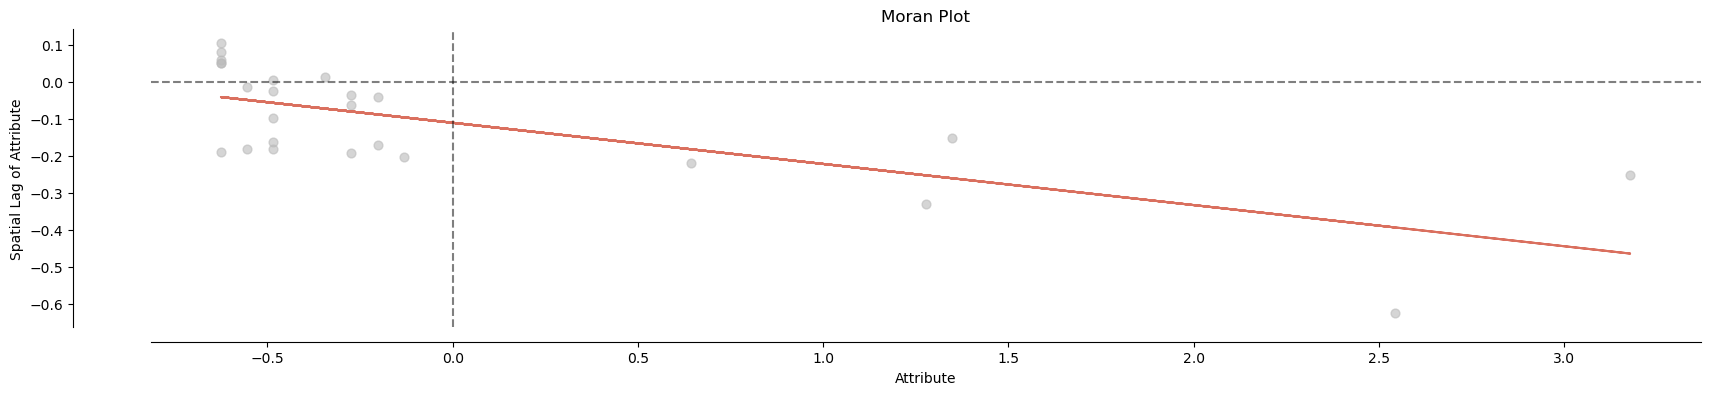

In [98]:
########################################### QUESTION 5 ###########################################


#------------------------------- FUNCTION ----------------------------------------------
#defining the function. It needs the attribute y and the weights W
def plot_moran(W, y, output = 'Moran Plot.png'):

    #calculating Moran's I with esda.Moran
    moran = esda.Moran(y,W)

    # ----------------------- PLOT ----------------------------
    # 1, 1 produces one plot only (in case we wanted more we change these values)
    # figsize adjusts dimensions of the plot
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    moran_scatterplot(moran, ax=ax)

    #Title, labels and showing the graph
    ax.set_title('Moran Plot')
    ax.set_xlabel('Attribute')
    ax.set_ylabel('Spatial Lag of Attribute')
    plt.show()
    
    #saving the figure
    fig.savefig(output,dpi=300)
#-----------------------------------------------------------------------------------------


#calling the function
plot_moran(W,y)

#####################################################################################################